# Basic statistics and visualization technqiues

Our goal in this notebook is to introduce some basic notions from statistics, along with some visualization techniques. We will use the "real_estate_valuation" and "wine" datasets for visualization.  

As usual, let's start by importing the necessary libraries and datasets (we use the train sets).

In [173]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the seaborn plots
sns.set_style("whitegrid")

# read in the data
rev = pd.read_csv('../data/regression/real_estate_valuation/train.csv')
wine = pd.read_csv('../data/classification/wine/train.csv')

# get data description for both datasets
rev_vars = pd.read_csv('../data/regression/real_estate_valuation/data_description.csv')
wine_vars = pd.read_csv('../data/classification/wine/data_description.csv')

# keep only name, role, type, and new_col_name of vars dataframes
rev_vars = rev_vars[['new_col_name', 'name', 'type', 'role']]
wine_vars = wine_vars[['new_col_name', 'name', 'type', 'role']]

In [174]:
print(f'Real estate valuation dataset: {rev.shape[0]} rows, {rev.shape[1]} columns')
print(rev_vars)
print(f'Wine dataset: {wine.shape[0]} rows, {wine.shape[1]} columns')
print(wine_vars)

Real estate valuation dataset: 331 rows, 7 columns
  new_col_name                                    name        type     role
0           No                                      No     Integer       ID
1           X1                     X1 transaction date  Continuous  Feature
2           X2                            X2 house age  Continuous  Feature
3           X3  X3 distance to the nearest MRT station  Continuous  Feature
4           X4         X4 number of convenience stores     Integer  Feature
5           X5                             X5 latitude  Continuous  Feature
6           X6                            X6 longitude  Continuous  Feature
7            Y              Y house price of unit area  Continuous   Target
Wine dataset: 142 rows, 14 columns
   new_col_name                          name         type     role
0             Y                         class  Categorical   Target
1            X1                       Alcohol   Continuous  Feature
2            X2           

## Basic descriptive statistics

### Distributions
A distribution is a generalization of the concept of a function. The precise definition is way too technical for our course, so instead we try to offer an intuitive understanding of the concept.

Recall that columns in our dataset correspond to observed features (or the target). Each column's values are a set of numbers, if it is continuous, or a finite set of categories, if it is categorical. A distribution is a function that describes how the values of a column are distributed. That is, it describes how likely it is to observe a value in a certain range. 

In visual terms, we can think of a distrbution simply as a *histogram*: this is a visualization technique in which we divide up the range of possible values of the variable (called the *support of the variable*) into a number of intervals (called *bins*), and then we count how many values fall into each bin. The count of each bin is usually reflected by the height of the bar corresponding to that bin. In this way, we can visualize how the values of a variable are distributed.

We illustrate this below by plotting histograms of the target columns of the two datasets.

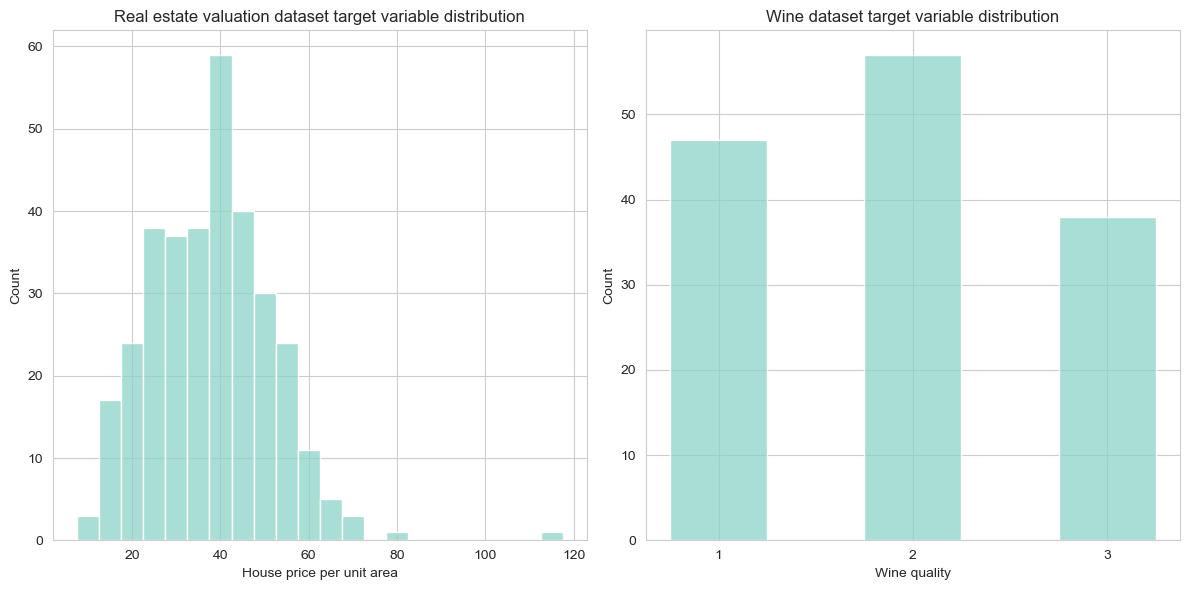

In [175]:
# plot the distributions of the target variables in both datasets

# create fig and axes with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# plot the distribution of the target variable in the real estate valuation dataset
sns.histplot(rev['Y'], ax=ax[0], binwidth=5)
ax[0].set_title('Real estate valuation dataset target variable distribution')
ax[0].set_xlabel('House price per unit area')
ax[0].set_ylabel('Count')

# plot the distribution of the target variable in the wine dataset
sns.histplot(wine['Y'], ax=ax[1], discrete=True, shrink=0.5)
ax[1].set_title('Wine dataset target variable distribution')
ax[1].set_xlabel('Wine quality')
ax[1].set_ylabel('Count')
ax[1].set_xticks([1,2,3])

plt.tight_layout()
plt.show()

The left plot visualizes the house price per unit area in the real estate dataset. Each bin represents a range of 5 dollars per unit area. Thus, the tallest bin in the middle indicates that there are around 60 houses that cost between 37.5 and 42.5 dollars per unit area. This is the most common price range in the dataset, and the histogram shows us that more expensive or less expensive houses are less common.

The right plot visualizes the wine quality. Since it is a categorical variable with three categories ($1$,$2$, and $3$), each bin here represents a category and not a range of values. By looking at it, we can see that the most common wine quality is 1, while the least common is 3. 

Note that when we plot a histogram of a continuous variable, we are in essence converting it into a categrical variable by dividing it into bins. That is, each bin corresponds to a category that we create (which represents a range of values of the original variable). This is why we can use the same visualization technique of histograms for both continuous and categorical variables.

### Mean, median, mode
It is useful to think of a distribution as a sum of two parts: there is a central, constant part (the "mean") around which the data clusters, and a variable part (the "variance") that describes how much the data deviates from the mean. The tendency of a data to cluster around a central value can be measured in a few different ways:

- **Sample mean**: This is the average of all the values in the sample. It is calculated by summing all the values and dividing by the number of values. Thus, if there are $m$ instances $x_1,\dotsc,x_m$ comprising a column vector $\mathbf{x} \in \mathbb{R}^m$ (assuming these are numerical values), the sample mean is $$\overline{\mathbf{x}} = \frac{1}{m} (\mathbf{x} \cdot \mathbf{1}) = \frac{1}{m} \left(\sum_{i=1}^m x_i \right).$$ However: 
    - The mean is sensitive to outliers, which can skew the average and paint an inaccurate picture of the data. 
    - The mean is not defined for categorical variables. NOTE: Sometimes, the categorical variable is encoded as a number (typically integer, as in the case of wine quality), in which case we may refer to is as an "ordinal variable". In this case, the mean is defined, but it is not exactly meaningful (unless the categories are ordered, in which case it is meaningful).
- **Sample median**: This is the middle value of the sample when it is sorted in ascending order. If there is an even number of values, the median is the average of the two middle values. The median is less sensitive to outliers than the mean, making it a more robust measure of central tendency in some cases. However:
    - The median does not factor in the actual values, only the order of the values. This means that two variables with very different distributions can have the same median, simply because they have the same middle value.
    - The median is not defined for categorical variables. However, it is defined for ordinal variables, in which case it may be meaningful.
- **Mode**: This is the most frequently occurring value in the data. A dataset can have multiple modes (bimodal, trimodal, etc.) or no mode at all. The mode is useful for categorical data where we wish to know which is the most common category. However, this measure doesn't mean anything for continuous variables, since they are unlikely to have repeated values. 

Below, we plot histograms of four randomly chosen features in the `wine` dataset, along with the respective mean and medians.

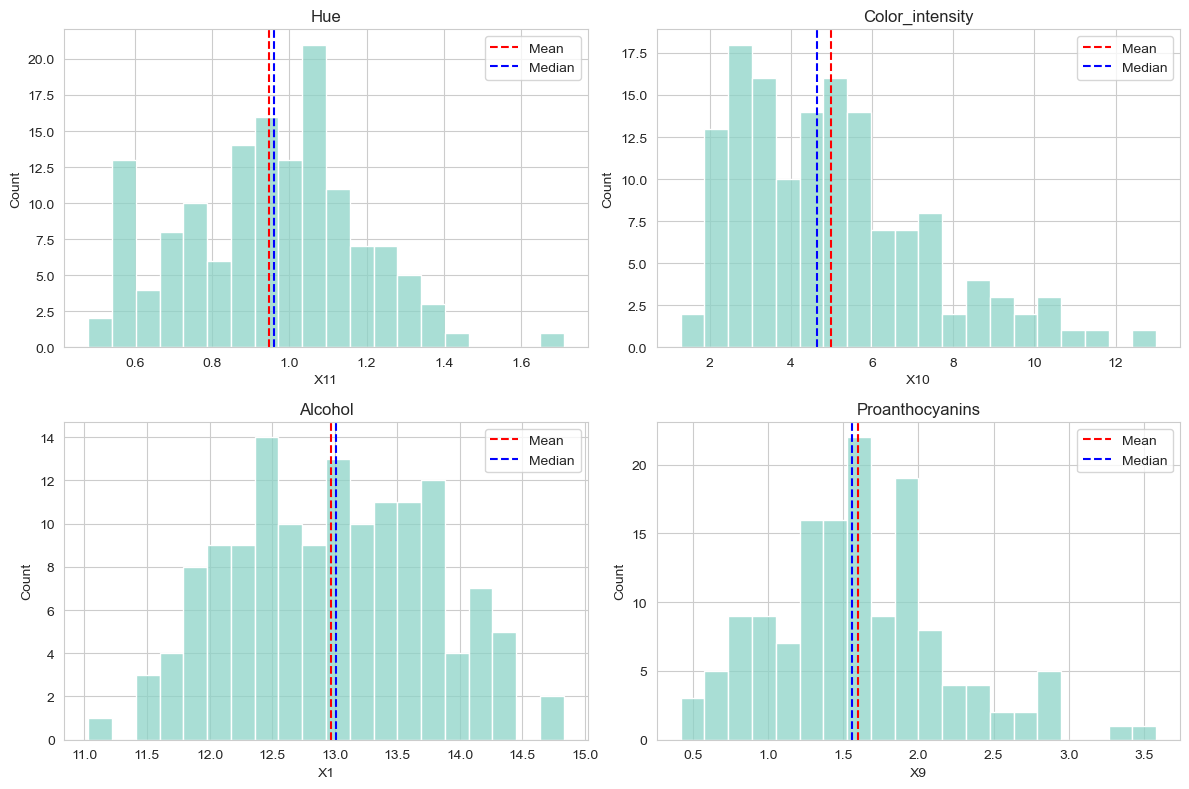

In [176]:
# plot histograms of all features in wine dataset, colored by target variable
# create fig and axes with 2 rows and 2 columns (last row will have two empty plots)
fig, ax = plt.subplots(2,2, figsize=(12,8))
# flatten the axes array
ax = ax.flatten()

# make a hashmap of new_col_name to name
features = wine_vars[wine_vars['role'] == 'Feature']
features_dict = dict(zip(features['new_col_name'], features['name']))

# plot histograms of 4 randomly chosen features
np.random.seed(42)
selected_features = [f'X{i}' for i in np.random.choice(range(1, len(features)), 4, replace=False)]
for i, col in enumerate(selected_features):
    # plot the histogram of the feature, colored by target variable
    sns.histplot(
        data=wine, x=col, ax=ax[i],
        bins=20 # distribute data into 20 equally spaced bins
    )
    # draw a red line at the mean
    ax[i].axvline(wine[col].mean(), color="red", linestyle="--", label="Mean")
    # draw a blue line at the median
    ax[i].axvline(wine[col].median(), color="blue", linestyle="--", label="Median")
    # set the title of the plot to the name of the feature
    ax[i].set_title(features_dict[col])
    ax[i].legend()

plt.tight_layout()
plt.show()

### Variance, standard deviation
The mean and median are measures of how "central" the values in a distribution are. The mean in particular can be thought of as the "center of mass" of the distribution. We can shift the center of mass to zero by subtracting the mean from each value ("de-meaning the data"). The result distrubution reveals how the values are distributed (or vary) around the mean. Then, there are two important quantities that are computed from these variations from the mean:

1. The **sample variance** is a measure of how spread out the sample values are around its mean. Denoting our sample as $\mathbf{x} = [\; x_1 \; \dotsb \; x_m \;]^T$, the "de-meaned" version of our sample is $\mathbf{x}' = \mathbf{x} - \overline{\mathbf{x}} \mathbf{1}$, where $\overline{\mathbf{x}}$ is the sample mean. Then, the sample variance is calculated by:
\begin{align*}
    s^2 & = \frac{1}{m-1} || \mathbf{x}' ||^2\\
                            & = \frac{1}{m-1}\sum_{i=1}^m (x_i - \overline{\mathbf{x}})^2.
\end{align*}
Note that this is almost the mean squared error of the sample from its mean, except that we divide by $m-1$ instead of $m$. This is called *Bessel's correction*, and we will not explain it here.
2. The **sample standard deviation** is simply the square root of the variance:
\begin{align*}
    s & = \frac{1}{\sqrt{m-1}} || \mathbf{x}' || \\
    & = \sqrt{\frac{1}{m-1}\sum_{i=1}^m (x_i - \overline{\mathbf{x}})^2}.
\end{align*}

The `pandas` package has the very convenient `describe` function to obtain some summary statistics on a dataframe. We illustrate this below with the `wine` dataset. The numbers in the table are the mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum of each column. (Recall that the 25th, 50th, and 75th percentiles are the values below which 25%, 50%, and 75% of the data fall, respectively.)

In [177]:
# use `describe`` to get summary statistics of the wine dataset
wine_summary = wine.describe()
wine_summary

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,Y
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.971479,2.340000,2.364859,19.625352,99.633803,2.273732,1.985352,0.360141,1.600211,4.989648,0.948986,2.606197,739.478873,1.936620
std,0.802521,1.101285,0.268380,3.380848,14.937448,0.621454,0.951952,0.119211,0.579777,2.334947,0.226647,0.689650,301.499014,0.773816
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.370000,1.610000,2.200000,17.200000,88.000000,1.705000,1.227500,0.270000,1.250000,3.057500,0.780000,1.970000,496.250000,1.000000
50%,13.010000,1.810000,2.360000,19.500000,97.000000,2.335000,2.135000,0.340000,1.560000,4.640000,0.960000,2.780000,673.500000,2.000000
75%,13.560000,3.170000,2.560000,21.500000,107.750000,2.800000,2.775000,0.430000,1.950000,6.182500,1.090000,3.160000,981.250000,3.000000
max,14.830000,5.800000,3.220000,30.000000,162.000000,3.880000,3.740000,0.630000,3.580000,13.000000,1.710000,3.920000,1515.000000,3.000000


Let's enhance our previous histograms of the `wine` dataset by adding vertical lines (black, dashed) to show the width of a standard deviation around the mean. 

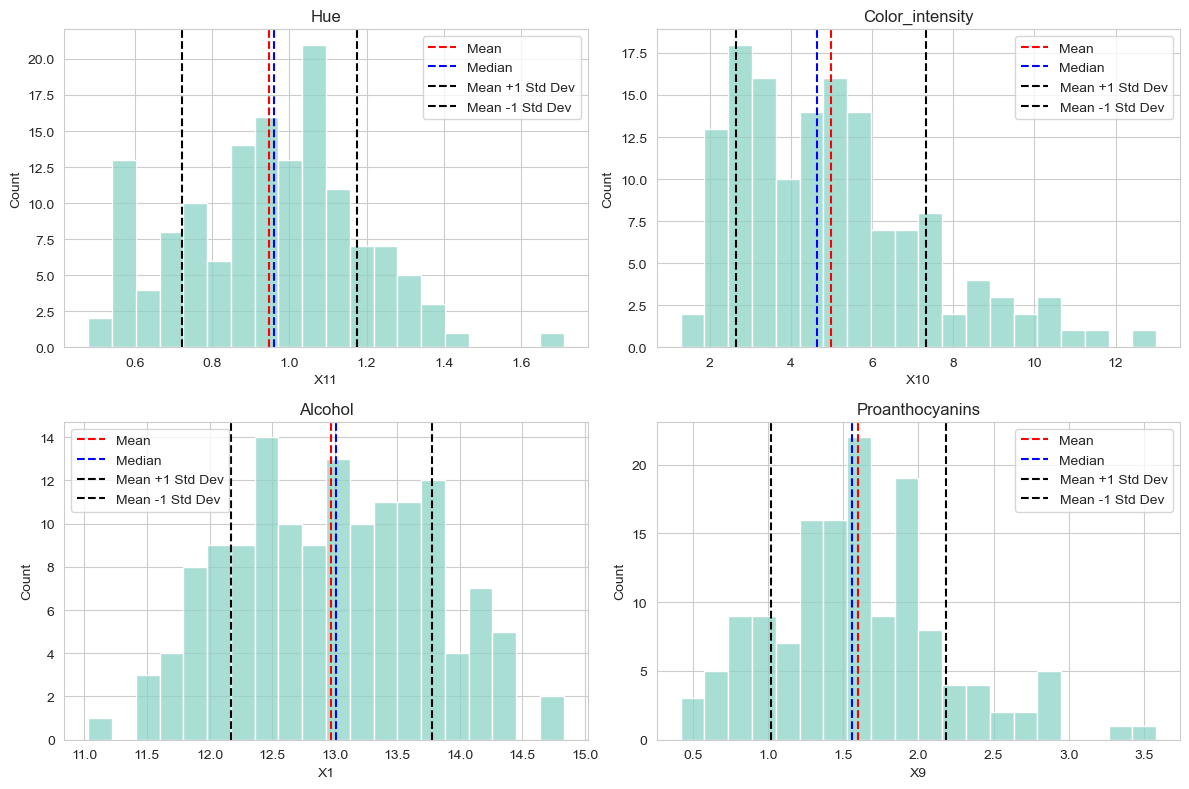

In [178]:
# plot histograms of all features in wine dataset, colored by target variable
# create fig and axes with 2 rows and 2 columns (last row will have two empty plots)
fig, ax = plt.subplots(2,2, figsize=(12,8))
# flatten the axes array
ax = ax.flatten()

# plot histograms of 4 randomly chosen features previously chosen in selected_features
for i, col in enumerate(selected_features):
    # plot the histogram of the feature, colored by target variable
    sns.histplot(
        data=wine, x=col, ax=ax[i],
        bins=20 # distribute data into 20 equally spaced bins
    )
    # draw a red line at the mean
    ax[i].axvline(wine[col].mean(), color="red", linestyle="--", label="Mean")
    # draw a blue line at the median
    ax[i].axvline(wine[col].median(), color="blue", linestyle="--", label="Median")
    # draw black dashed lines at the mean plus/minus 1 standard deviation
    ax[i].axvline(wine[col].mean() + wine[col].std(), color="black", linestyle="--", label="Mean +1 Std Dev")
    ax[i].axvline(wine[col].mean() - wine[col].std(), color="black", linestyle="--", label="Mean -1 Std Dev")
    # set the title of the plot to the name of the feature
    ax[i].set_title(features_dict[col])
    ax[i].legend()

plt.tight_layout()
plt.show()

### Box plots
There are some plotting techniques which allow us to visualize the spread of data around its mean. One of the simplest methods is the *box plot*. This is a graphical representation of the distribution of data based on a five-number summary: minimum, first quartile, median, third quartile, and maximum. The box plot is useful for identifying outliers and for comparing distributions:

- The "box" in the box plot represents the interquartile range (IQR), which is the range between the first and third quartiles. Thus, $50\%$ of the data falls in the box. 
- The "whiskers" extend from the box to the minimum and maximum values, excluding outliers (defined below). Thus, ignoring outliers, the bottom whisker represents the bottom $25\%$ of the data, while the top whisker represents the top $25\%$ of the data.
- Outliers are defined as values that are more than $1.5$ times the IQR away from the first and third quartiles. They are plotted as individual points outside the whiskers.

The box plot is a good way to visualize the spread of data, especially when comparing multiple groups. We illustrate this below with the `wine` dataset.

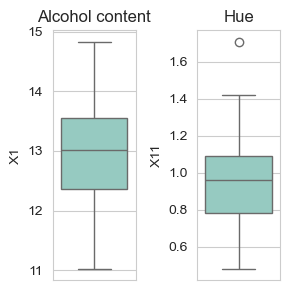

In [179]:
# visualize the spread of "aolcohol content" and "hue"

fig, ax = plt.subplots(1, 2, figsize=(3,3))

# plot the boxplot of the alcohol feature
sns.boxplot(
    data=wine, y='X1', ax=ax[0]
)
ax[0].set_title('Alcohol content')

# plot the boxplot of the volatile acidity feature
sns.boxplot(
    data=wine, y='X11', ax=ax[1]
)
ax[1].set_title('Hue')

plt.tight_layout()
plt.show()

## First steps toward probability

### From counts to probabilities
Suppose we have a variable $X$ in our dataset (could be feature or target). Recall that the **support** of $X$, denote $\textup{supp}(X)$, is the set of all possible values that $X$ can take. Thus:

- If $X$ is a categorical variable, then $\textup{supp}(X)$ is the set of all categories. For example, if $Y$ denotes `class` in the `wine` dataset, then $\textup{supp}(Y) = \{1,2,3\}$. 
- If $X$ is a continuous variable, then $\textup{supp}(X)$ is an infinite set of real numbers representing all possible values (in principle) that $X$ could take. For example, if $X$ denotes `X1` (alcohol content) in the `wine` dataset, then $\textup{supp}(X) = [0,\infty)$.

Now, we want to define a notion of "probability" for the values of $X$. That is, given a subset $S$ of the support of $X$, we want to define the probability of $X$ being in $S$:
\begin{equation*}
    \textup{Pr}(X \in S) = \textup{Probability that $X$ is in $S$}.
\end{equation*}

A very natural first attempt would be to define
\begin{equation*}
    \textup{Pr}(X \in S) = \frac{\textup{Number of instances with $X \in S$}}{\textup{Total number of instances}}.
\end{equation*}
As we will see, this definition works well for categorical variables, but not so well for continuous variables.

### Probability mass functions (PMF)
Let $Y$ denote the feature `class` from the `wine` dataset, which is a categorical variable with $\textup{supp}(Y) = \{1,2,3\}$. The **probability mass function** of $Y$ is the function 
\begin{equation*}
    p_Y : \{ 1,2,3\} \to [0,1]
\end{equation*}
defined by
\begin{align*}
    p_Y(i) & = \textup{Pr}(Y = i)\\
        & = \textup{Probability that $Y$ is equal to $i$}\\
        & = \frac{\textup{Number of instances with $Y = i$}}{\textup{Total number of instances}}.
\end{align*}
Thus, $p_Y(i)$ is the probability that a randomly chosen instance has class $i$. Note that each $p_Y(i)$ is a number between $0$ and $1$, and that
\begin{align*}
    \sum_{i \in \textup{supp}(Y)} p_Y(i) & = \sum_{i \in \textup{supp}(Y)} \frac{\textup{Number of instances with $Y = i$}}{\textup{Total number of instances}}\\
        & = \frac{1}{\textup{Total number of instances}} \sum_{i \in \textup{supp}(Y)} \textup{Number of instances with $Y = i$}\\
        & = \frac{\textup{Total number of instances}}{\textup{Total number of instances}}\\
        & = 1,
\end{align*}
which is indeed what we expect from a probability.

Then, for any subset $S \subset \textup{supp}(Y)$, we can define the probability of $Y$ being in $S$ simply as the sum of the probabilities of $Y$ being equal to each value in $S$:
\begin{equation*}
    \textup{Pr}(Y \in S) = \sum_{i \in S} p_Y(i).
\end{equation*}
We illustrate this below with the `class` in the `wine` dataset. 

In [180]:
#simple function to generate all non-empty sublists of a given list
from itertools import chain, combinations
def get_sublists(s):
    """
    Generates all non-empty sublists of a given list.
    """
    return [list(subset) for subset in chain.from_iterable(combinations(s, r) for r in range(len(s)+1))][1:]

# Compute the probability mass function of `Y` in the `wine` dataset
wine_pmf = wine['Y'].value_counts(normalize=True).sort_index()
power_set = get_sublists(wine_pmf.index)
power_set

# for each subset of the support of Y, compute the prob of Y being in that 
# store the results in a dataframe, with one column for the subset (written as a string) and the other column for the prob
results = []
for subset in power_set:
    prob = wine_pmf[subset].sum()
    results.append({'subset': str(subset), 'prob': prob})
probs_df = pd.DataFrame(results)
probs_df

,subset,prob
0,[1],0.330986
1,[2],0.401408
2,[3],0.267606
3,"[1, 2]",0.732394
4,"[1, 3]",0.598592
5,"[2, 3]",0.669014
6,"[1, 2, 3]",1.000000


For a discrete variable, plotting the probabilities is super easy using seaborns `histplot`: simply use the parameter `stat = probability`. This has the effect of dividing the height of each bin by the total number of instances, thereby reflecting the probability mass of that particular value in the support. 

To illustrate this, let's plot all probabilities for all features in the `car_evaluation` dataset.

Car evaluation dataset: 1382 rows, 7 columns
  new_col_name      name         type     role
0           X1    buying  Categorical  Feature
1           X2     maint  Categorical  Feature
2           X3     doors  Categorical  Feature
3           X4   persons  Categorical  Feature
4           X5  lug_boot  Categorical  Feature
5           X6    safety  Categorical  Feature
6            Y     class  Categorical   Target


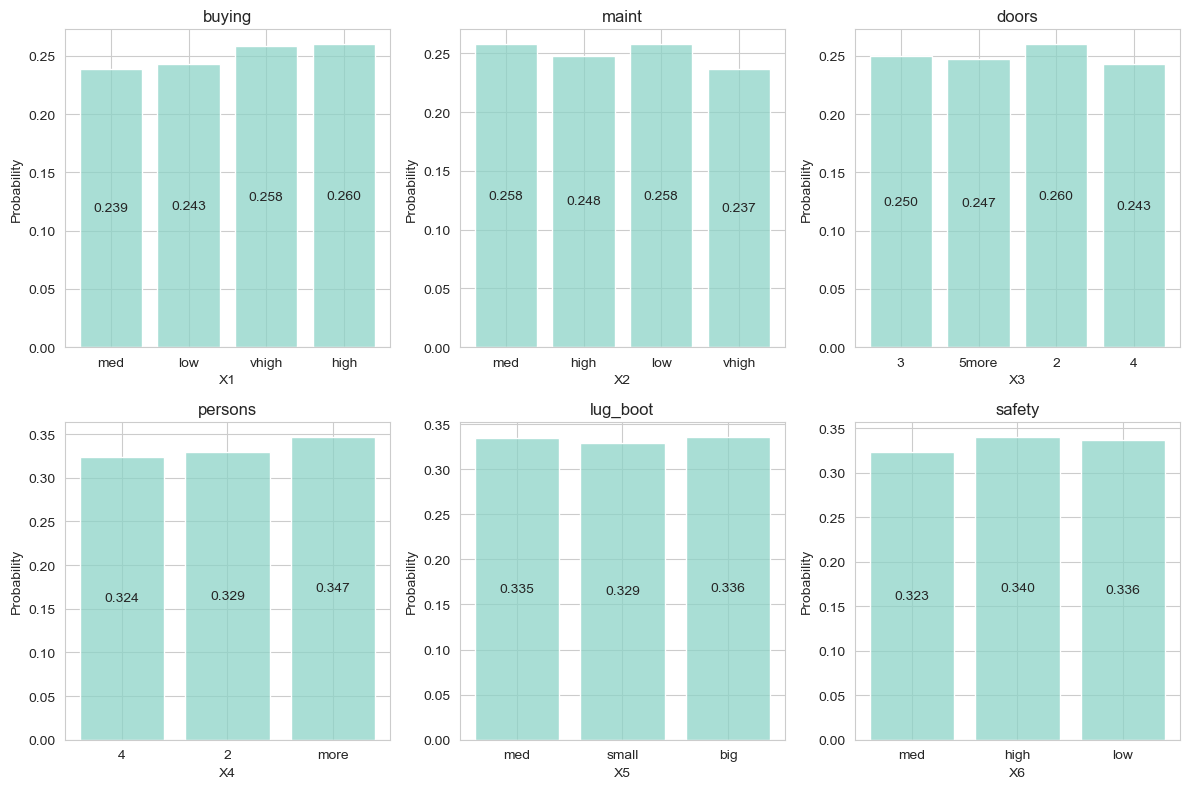

In [181]:
# read in the car evaluation dataset
cars = pd.read_csv('../data/classification/car_evaluation/train.csv')
cars_vars = pd.read_csv('../data/classification/car_evaluation/data_description.csv')
# keep only name, role, type, and new_col_name of vars dataframe
cars_vars = cars_vars[['new_col_name', 'name', 'type', 'role']]
print(f'Car evaluation dataset: {cars.shape[0]} rows, {cars.shape[1]} columns')
print(cars_vars)
# make a hashmap of new_col_name to name
features = cars_vars[cars_vars['role'] == 'Feature']
features_dict = dict(zip(features['new_col_name'], features['name']))
# plot probability mass functions of all features
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
# flatten the axes array
ax = ax.flatten()

# plot the probability mass function of each feature
for i, col in enumerate(features_dict.keys()):
    # plot the probability mass function of the feature
    sns.histplot(
        data=cars, x=col, stat='probability', discrete=True, shrink=0.8, ax=ax[i]
    )
    # display the probabilities inside the bars
    for j, v in cars[col].value_counts(normalize=True).sort_index().items():
        ax[i].text(j, v/2, f'{v:.3f}', ha='center', va='center')
    # set the title of the plot to the name of the feature
    ax[i].set_title(features_dict[col])
plt.tight_layout()
plt.show()

### Probability density functions (PDF)
Suppose now that we have a continuous variable $X$ with $\textup{supp}(X) = \mathbb{R}$ (for simplicity). In this case, the subset $S$ of the support that we are interested in will typically be an interval $[a,b]$ (or open interval $(a,b)$; it does not matter). Thus, our naive definition of probability would lead to the following definition:
\begin{equation}\tag{1}
\begin{alignedat}{1}
    \textup{Pr}(X \in [a,b]) & = \textup{Pr}(a \leqslant X \leqslant b)\\
        & = \frac{\textup{Number of instances with $a \leqslant X \leqslant b$}}{\textup{Total number of instances}}.
\end{alignedat}
\end{equation}
This definition can lead to strange results; the key point is that our dataset will have only finitely many instances ($m$, say), so any interval $[a,b]$ which does not contain any of the values that we see will be assigned a probability of $0$. This is not what we want, since it is possible that $X$ could take a value in $[a,b]$ even if we don't see any values in that interval. Indeed, when we plot a histogram, the taller the bar, the more likely it is that we will see a value in that interval, so choosing an interval inside that bar should result in a non-zero probability.

To resolve this complication, we basically need to correctly adapt the "discrete" set-up in the case of categorical variables to a "continuous" set-up for continuous variables. That is, instead of a PMF, we seek a **probability density function** (PDF), which is a function $$p_X: \textup{supp}(X) \to [0,\infty)$$ such that for any interval $[a,b] \subset \textup{supp}(X)$, we have
\begin{equation*}
    \textup{Pr}(X \in [a,b]) = \int_a^b p_X(x) dx. 
\end{equation*}
Thus, we can think of the PDF as a "continuous" version of the PMF: in the discrete case, the probability that $X$ lies in a subset $S$ is given by summing over the probability masses of each value in $S$. In the continuous case, the probability that $X$ lies in an interval $[a,b]$ is given by *continuously summing* (i.e. integrating) the probability densities over all values in the interval. 

So, how do we obtain the PDF? Or at least, how do we obtain an approximation of the PDF? 

The key idea is to view the histogram as an approximation of the PDF. In fact, the bins of the histogram should be thought of as the rectangles in a Riemann sum that approximates the area under the curve of the PDF. As we decrease the width of the bins, the histogram will (in theory) converge to the PDF. (Of course, ironically enough, if we decrease the bin-width too much then we will not have enough data to fill the bins, and the histogram will be very noisy.)

### Approximating the PDF with histograms
Suppose we use $k$ adjacent bins of width $\Delta X$ in our histogram of a continuous variable $X$ (assume that we have $m$ instances in our sample). Let $x_1,\dotsc,x_k$ denote the mid-points of these bins. We want to define an approximation $f_X$ of the PDF such that
\begin{equation*}
    p_X(x) \approx f_X(x_i) \textup{ for  all $x$ in the $i$-th bin}.
\end{equation*}
In other words, we want to approximate the PDF by a step function that is constant on each bin. To figure out what each $f_X(x_i)$ should be, let $C_i$ denote the count of the $i$-th bin, so that $$\textup{total number of instances} = \sum_{i=1}^k C_i = m.$$
Then,
\begin{equation*}
    \textup{Area of the $i$-th bin} = C_i \Delta X.
\end{equation*}
So, the total area of the histogram is
\begin{equation*}
    \textup{Area of the histogram} = \sum_{i=1}^k C_i \Delta X = m \Delta X.
\end{equation*}
So, if we want the area of the histogram to be equal to $1$, we need to divide each count by $m \Delta X$. Thus, we define
\begin{equation*}
    f_X(x_i) = \frac{C_i}{m \Delta X}, \quad \textup{ for } i=1,\dotsc,k.
\end{equation*}
Note: another (perhaps equally natural) approximation would be to define $f_X(x_i)$ as above, and then connect the points $f_X(x_i)$ with straight lines (which would resemble the trapezoidal rule for approximating integrals).

We illustrate both apprximations below using the `X1` (`alcohol content`) feature from the `wine` dataset:

- The parameter `stat='density'` in the `histplot` function has the effect of dividing each count by $m \Delta X$, thereby approximating the PDF. 
- The parameter `element='bars'` plots the approximation as a collection of bars, whereas `element='poly'` plots the approximation as trapezoids. You can also use `element='step'` to plot the approximation as a step function.
- The parameter `kde=True` plots a so-called **kernel density estimate** (KDE) of the PDF, which is a more sophisticated and smooth approximation of the PDF (this could potentially be thought of as the "true" PDF).

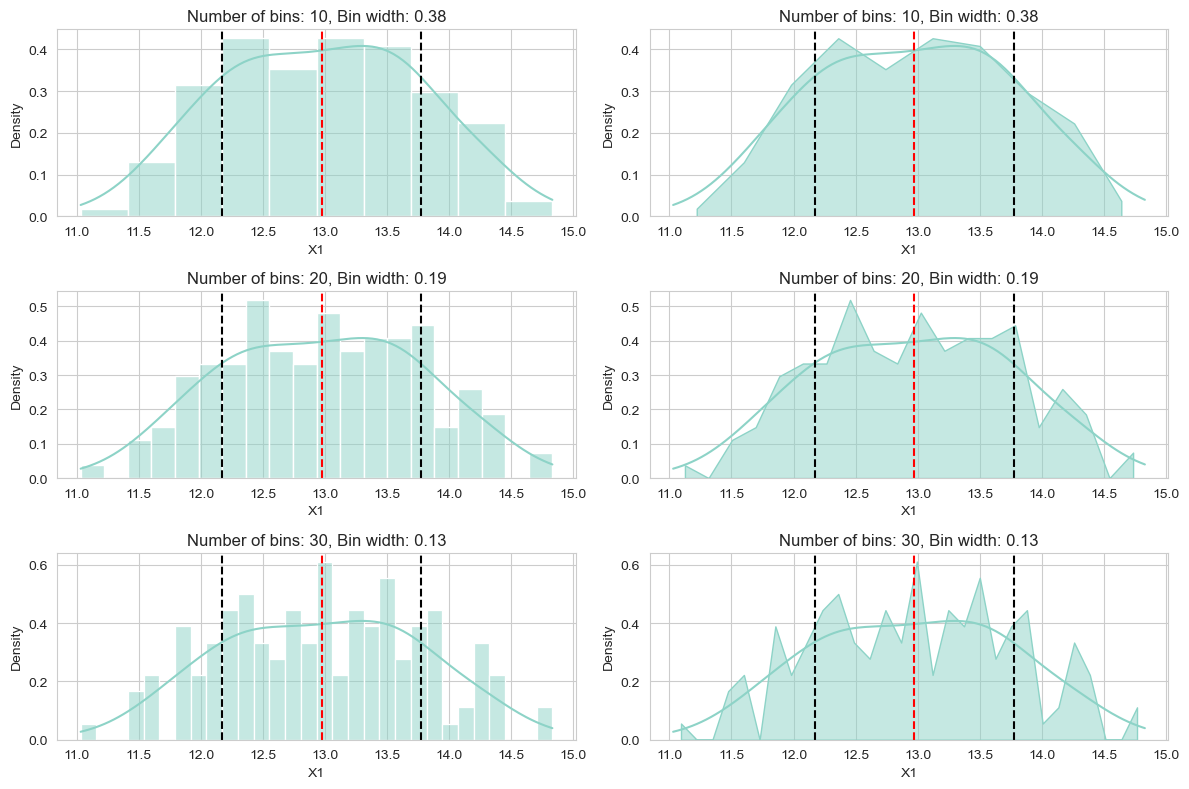

In [205]:
fig, ax = plt.subplots(3, 2, figsize=(12, 8))
# flatten the axes array

# calculate bin width based on data range
data_range = wine['X1'].max() - wine['X1'].min()

for i, bins in enumerate([10, 20, 30]):
    # calculate bin width
    bin_width = data_range / bins
    for j, element in enumerate(['bars','poly']):
        # plot the probability density function of the feature
        sns.histplot(
            data=wine, x='X1', stat='density', bins=bins, ax=ax[i][j], kde=True, element=element
        )
        # draw a red line at the mean
        ax[i][j].axvline(wine['X1'].mean(), color="red", linestyle="--", label="Mean")
        # draw black dashed lines at the mean plus/minus 1 standard deviation
        ax[i][j].axvline(wine['X1'].mean() + wine['X1'].std(), color="black", linestyle="--", label="Mean +1 Std Dev")
        ax[i][j].axvline(wine['X1'].mean() - wine['X1'].std(), color="black", linestyle="--", label="Mean -1 Std Dev")
        # set the title to show both number of bins and bin width
        ax[i][j].set_title(f'Number of bins: {bins}, Bin width: {bin_width:.2f}')
plt.tight_layout()
plt.show()

It is also possible to directly plot the KDE approximation of the PDF (without the bars of the histogram) using seaborn's `kdeplot` function. Let's illustrate this by plotting the KDE of all the features in the `wine` dataset.

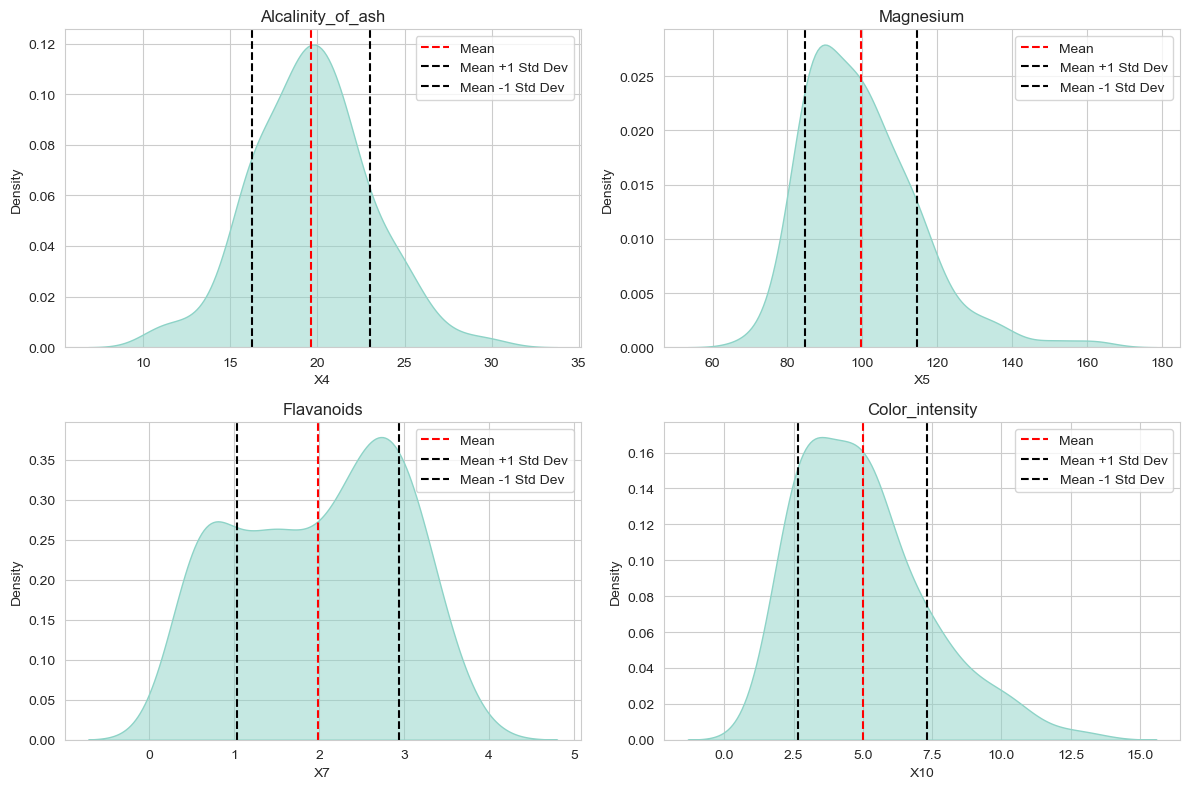

In [183]:
features = wine_vars[wine_vars['role'] == 'Feature']
features_dict = dict(zip(features['new_col_name'], features['name']))

# plot kde of 4 randomly chosen features in the wine dataset
np.random.seed(4)
selected_features = [f'X{i}' for i in np.random.choice(range(1, len(features)), 4, replace=False)]
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
# flatten the axes array
ax = ax.flatten()
# plot kde of 4 randomly chosen features
for i, col in enumerate(selected_features):
    # plot the kde of the feature
    sns.kdeplot(
        data=wine, x=col, ax=ax[i], fill=True, alpha=0.5
    )
    # add a red vertical line at the mean
    ax[i].axvline(wine[col].mean(), color="red", linestyle="--", label="Mean")
    # add black dashed lines at the mean plus/minus 1 standard deviation
    ax[i].axvline(wine[col].mean() + wine[col].std(), color="black", linestyle="--", label="Mean +1 Std Dev")
    ax[i].axvline(wine[col].mean() - wine[col].std(), color="black", linestyle="--", label="Mean -1 Std Dev")
    # set the title of the plot to the name of the feature
    ax[i].set_title(features_dict[col])
    ax[i].legend()
plt.tight_layout()
plt.show()

### Violin plots
A **violin plot** is a combination of a box plot and a KDE plot. It shows the distribution of the data at different values, which is useful for comparing multiple groups. The width of the violin at each value indicates the density of the data at that value, while the box plot inside the violin shows the summary statistics (minimum, first quartile, median, third quartile, and maximum). In general, it is also a rather pretty plot!

We illustrate this below with 4 violin plots of features from the `wine` dataset.

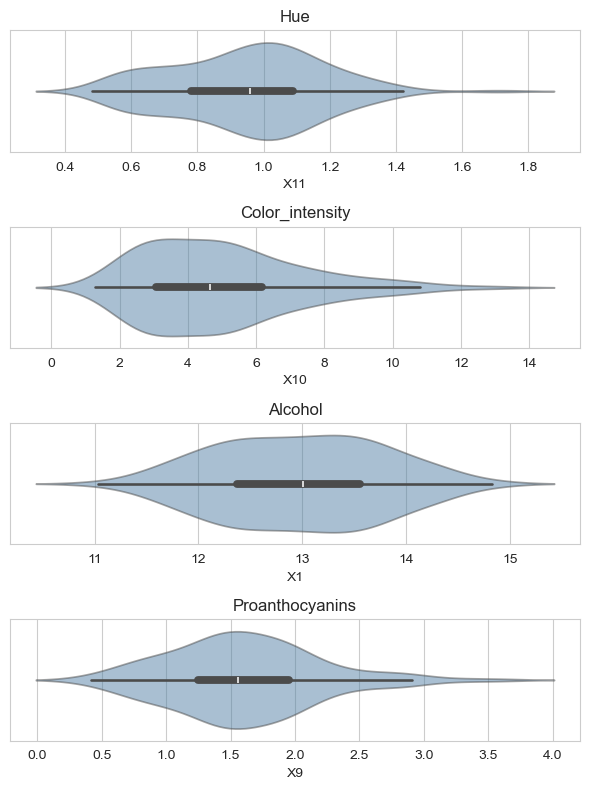

In [211]:
# Plot violin plots of 4 randomly chosen features in the wine dataset
np.random.seed(42)
selected_features = [f'X{i}' for i in np.random.choice(range(1, len(features)), 4, replace=False)]
fig, ax = plt.subplots(4, 1, figsize=(6,8))
for i, col in enumerate(selected_features):
    sns.violinplot(
        data=wine, x=col, ax=ax[i], orient='h', inner='box', color='steelblue', alpha=0.5
    )
    ax[i].set_title(features_dict[col])
plt.tight_layout()
plt.show()

### Random variables
One of the most important concepts in statistics is the concept of a **random variable**. This is an abstraction of the concept of a variable that we see in our datasets. Namely, a random variable is an abstract concept corresponding to a variable in our dataset, but which is not necessarily observed. Thus, it carries its own distribution, which is a function that describes how the values of the variable are distributed. In statistics, we are often interested in the distribution of a random variable, rather than the values that we observe in our dataset. This is because we believe that there is an underlying "true" distribution of the random variable, and the goal of (inferential) statistics is to *estimate* this distribution from the observed values in our dataset.

The set of all possible values of a random variable $X$ is called its **support**, denoted $\textup{supp}(X)$. It is also sometimes called the **sample space** of $X$. It is more proper to think of a random variable as the data of a pair $(\Omega, p_X)$, where $\Omega = \textup{supp}(X)$ is the sample space, and $p_X$ is a PMF or PDF:

1. **Discrete case**: In this case, $\Omega$ is finite, and $p_X$ is a PMF, i.e. $p_X: \Omega \to [0,1]$ is a function that satisfies  $$\sum_{x \in \Omega} p_X(x) = 1.$$ 
2. **Continuous case**: In this case, $\Omega = \mathbb{R}$ or some interval on $\R$. In fact, for convenience and/or simplicity, we can always assume that $\Omega = \mathbb{R}$ by defining the PDF $p_X$ to be $0$ outside of the interval of interest. So, we can always regard our PDF $p_X: \mathbb{R} \to [0,\infty)$ as a function whose values add up to $1$, where "add" here means *continuous summation*... that is, an integral: $$\int_{-\infty}^{\infty} p_X(x) dx = 1.$$ 

### Visualizing categorical targets in histograms
When the target is categorical, it is useful to visualize the various classes using colors in a given histogram of a feature. For example, we can use three different colors to denote the possible classes of wine quality in the histogram of the alcohol content. In `seaborn`'s `histplot` function, we can use the `hue` parameter to color the histogram bars according to the target class, and we can choose the color palette using the `palette` parameter. We can also choose how the different colored bars interact with each other using the `multiple` parameter. Let's illustrate this by plotting a histogram of the alcohol content in the `wine` dataset, colored by the wine quality.

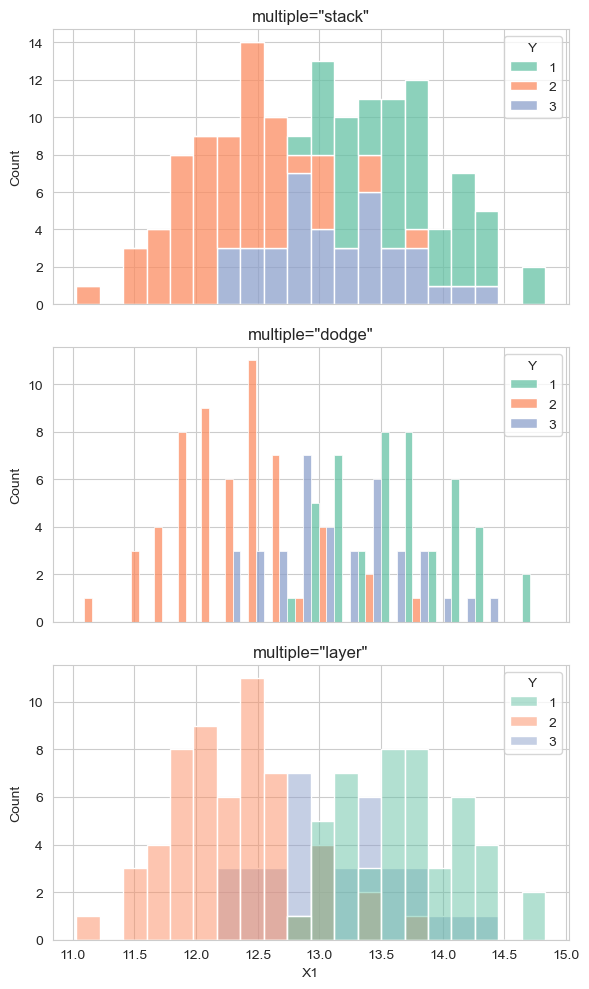

In [15]:
# plot histogram of alcohol (X1), colored by target variable
# use a grid with 3 subplots to illustrate different choices of the `multiple` parameter
fig, ax = plt.subplots(3,1, figsize=(6, 10),sharex=True)
# plot the histogram of the alcohol feature, colored by target variable
sns.histplot(
    data=wine, x='X1', hue='Y', ax=ax[0],
    multiple="stack", bins=20, palette="Set2"
)
ax[0].set_title('multiple="stack"')
ax[0].set_xlabel('Alcohol content (X1)')

sns.histplot(
    data=wine, x='X1', hue='Y', ax=ax[1],
    multiple="dodge", bins=20, palette="Set2"
)
ax[1].set_title('multiple="dodge"')

sns.histplot(
    data=wine, x='X1', hue='Y', ax=ax[2],
    multiple="layer", bins=20, palette="Set2"
)

ax[2].set_title('multiple="layer"')

plt.tight_layout()
plt.show()

### Normalization
For a lot of machine learning algorithms, it turns out to be important the features are on the same scale. This is because some algorithms are sensitive to the scale of the features, and may give more importance to features with larger scales. To avoid this, we can normalize the features so that they all have the same scale. One common way to normalize a feature is to **standardize** its distribution: we first de-mean the feature column, and then divide by the (sample) standard deviation. This way, the feature column has a mean of zero and a standard deviation of one (these are, for various good reasons, considered to be the most "normal" or "standard" measures for a distribution). This is done by the `StandardScaler` class in `sklearn`. We illustrate this below by standardizing the `wine` dataset.

### Probability functions


In [ ]:
# compute the probability of each class in the wine dataset
wine_probs = wine['Y'].value_counts(normalize=True)
# by default, the value counts are sorted in descending order of frequency, we re-sort by index, i.e. the values of Y
wine_probs = wine_probs.sort_index()
# convert to a dataframe with columns 'Y' and 'p_Y'
wine_probs = pd.DataFrame({'Y': wine_probs.index, 'p_Y': wine_probs.values})
wine_probs

,Y,p_Y
0,1,0.330986
1,2,0.401408
2,3,0.267606
